In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
data = pd.read_csv('../../data/train.csv', dtype = types)

data.head(2)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000


In [3]:
plt.style.use('ggplot')

In [4]:
data['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

In [5]:
cant_log = data[['tipodepropiedad']]
cant_log = cant_log.assign(count = 1)
cant_log = cant_log.groupby('tipodepropiedad').agg({'count':'sum'})
cant_log = cant_log.applymap(lambda x: np.log(x)).reset_index().sort_values(by ='count', ascending = False)
cant_log.head()

,tipodepropiedad,count
2,Casa,11.861587
0,Apartamento,10.956771
3,Casa en condominio,9.867705
20,Terreno,9.204825
12,Local Comercial,8.024535


Text(0, 0.5, 'Tipo de propiedad')

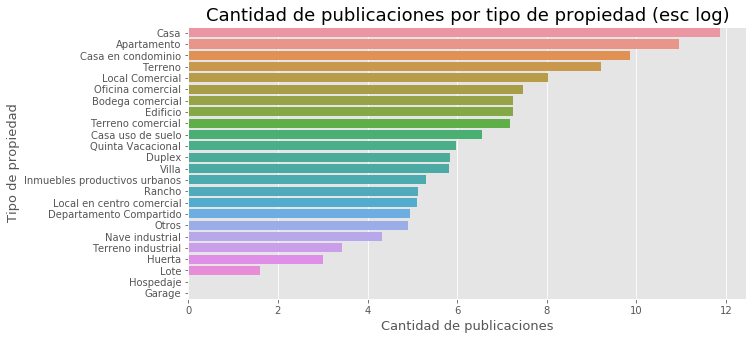

In [6]:
plt.figure(figsize = (10,5))
g = sns.barplot(x='count', y = 'tipodepropiedad', data = cant_log)
g.set_title("Cantidad de publicaciones por tipo de propiedad (esc log)", fontsize=18)
g.set_xlabel("Cantidad de publicaciones",fontsize=13)
g.set_ylabel("Tipo de propiedad",fontsize=13)

In [7]:
casa_garage = data[data['tipodepropiedad'] == 'Casa'][['garages']].reset_index(drop=True)
casa_garage.head()

,garages
0,2.0
1,1.0
2,1.0
3,2.0
4,1.0


Text(0, 0.5, 'Cantidad de publicaciones de casas')

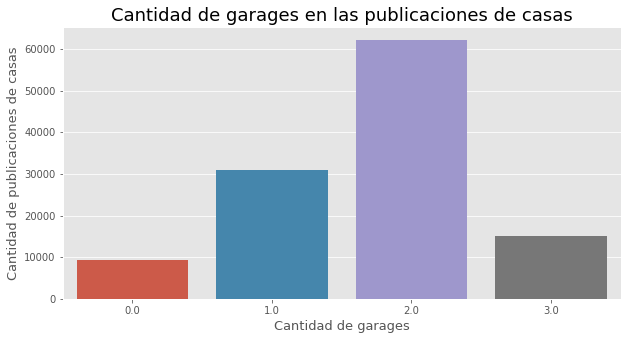

In [8]:
plt.figure(figsize = (10,5))
g = sns.countplot(x='garages', data = casa_garage)
g.set_title("Cantidad de garages en las publicaciones de casas", fontsize=18)
g.set_xlabel("Cantidad de garages", fontsize=13)
g.set_ylabel("Cantidad de publicaciones de casas", fontsize=13)

In [9]:
casa_garage = data[data['tipodepropiedad'] == 'Casa'][['garages','precio']].reset_index(drop=True)
#casa_garage.groupby('garages').agg({'precio':'mean'}).reset_index()

Text(0, 0.5, 'Precio')

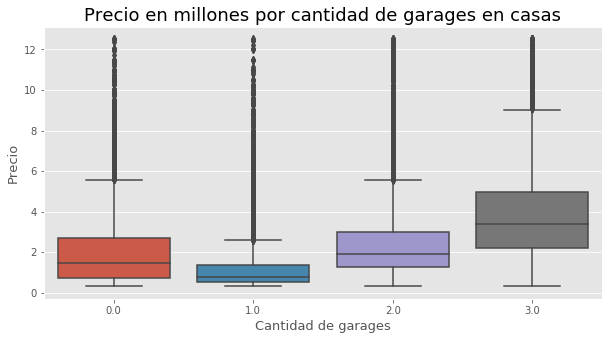

In [10]:
plt.figure(figsize = (10,5))
x = sns.boxplot(x=casa_garage['garages'], y=casa_garage['precio']/1000000)
x.set_title("Precio en millones por cantidad de garages en casas", fontsize=18)
x.set_xlabel("Cantidad de garages", fontsize=13)
x.set_ylabel("Precio", fontsize=13)